In [47]:
%matplotlib inline

from ssm.dglm import NormalDLM
from ssm.univariatestructure import UnivariateStructure
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =(8,4)

# Dynamic Generalised Linear Models

## Dynamic Linear Models

Dynamic linear models are a specific instance of state-space models where the observation and states are defined by

$$
Y_t|\theta_t,\Phi_t \sim \mathcal{N}\left(\theta_t; \mathsf{F}^T\theta_{t}, V\right) \\
\theta_t|\theta_{t-1},\Phi_t \sim \mathcal{N}\left(\theta_t;\mathsf{G}\theta_{t-1}, \mathsf{W}\right)
$$

### Locally constant

The _locally constant_ DLM corresponds to a simple state random walk, where the structure is defined by

$$
\mathsf{F}=\begin{bmatrix}1\end{bmatrix} \\
\mathsf{G}=\begin{bmatrix}1\end{bmatrix}
$$

This can be specified by using (in this case with a state variance of $\tau^2=1.4$):

In [38]:
lc = UnivariateStructure.locally_constant(1.4)
print("F = {}, G = {}".format(lc.F, lc.G))

F = [[1]], G = [[1]]


We can then instantiate a DLM (with observation variance $\sigma^2=1.4$):

In [39]:
ndlm = NormalDLM(structure=lc, V=1.4)

Assuming we have a state prior of

$$\theta_0 \sim \mathcal{N}\left(0, 1\right)$$

we can then generate the states $\theta_{1:T}$ and observation $y_{1:T}$:

In [43]:
# the initial state prior
m0 = np.array([0])
C0 = np.matrix([[1]])
state0 = mvn(m0, C0).rvs()

states = [state0]

for t in range(1, 100):
    states.append(ndlm.state(states[t-1]))
    
obs = [None]
for t in range(1, 100):
    obs.append(ndlm.observation(states[t]))

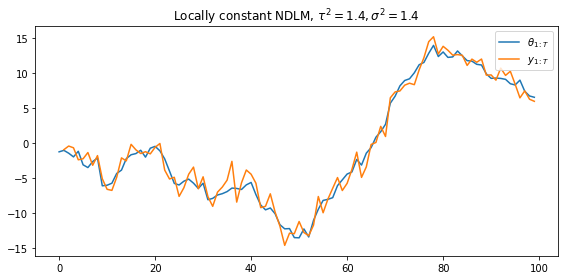

In [48]:
t = range(100)
plt.plot(t, states)
plt.plot(t, obs)
plt.legend([r"$\theta_{1:T}$", r"$y_{1:T}$"], loc=1)
plt.title(r"Locally constant NDLM, $\tau^2=1.4, \sigma^2=1.4$")
plt.tight_layout()

### Locally linear

A _locally linear_ structure incorporates both an underlying mean and a trend. In this case the structure corresponds to
$$
\mathsf{F}=\begin{bmatrix}1 & 0\end{bmatrix}, \qquad \mathsf{G}=\begin{bmatrix}1 & 1 \\ 1 & 0 \end{bmatrix}.
$$
If we assume a state covariance of
$$
\mathsf{W}=\begin{bmatrix}0.1 & 0 \\ 0 & 0.1 \end{bmatrix}
$$
we can create the structure as:

In [49]:
W = np.matrix([[0.1, 0], [0, 0.1]])
ll = UnivariateStructure.locally_linear(W)

and the Normal DLM structure can be created (with a state variance of $\sigma^2=2.5$) using:

In [50]:
ndlm = NormalDLM(structure=ll, V=2.5)

In this case we will assume a state prior of
$$
\theta_0 \sim \mathcal{N}\left(\begin{bmatrix}0 & -1\end{bmatrix}, \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}\right)
$$
and we can generate the states and observations as:

In [51]:
# the initial state prior
m0 = np.array([0, -1])
C0 = np.identity(2)
state0 = mvn(m0, C0).rvs()

states = [state0]

for t in range(1, 100):
    states.append(ndlm.state(states[t-1]))
    
obs = [None]
for t in range(1, 100):
    obs.append(ndlm.observation(states[t]))

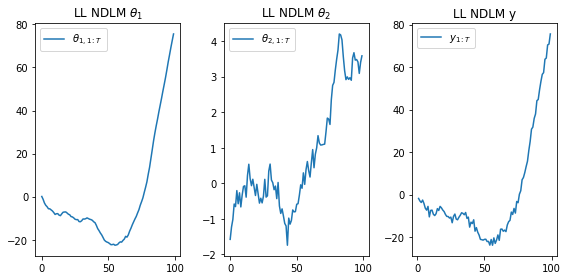

In [60]:
import matplotlib.pyplot as plt
t=range(100)
plt.subplot(1, 3, 1)
plt.plot(t, [state[0] for state in states])
plt.legend([r"$\theta_{1,1:T}$"], loc=0)
plt.title(r"LL NDLM $\theta_1$")
plt.subplot(1, 3, 2)
plt.plot(t, [state[1] for state in states])
plt.legend([r"$\theta_{2,1:T}$"], loc=0)
plt.title(r"LL NDLM $\theta_2$")
plt.subplot(1, 3, 3)
plt.plot(range(100), obs)
plt.legend([r"$y_{1:T}$"], loc=0)
plt.title(r"LL NDLM y")
plt.tight_layout()

### Fourier seasonality

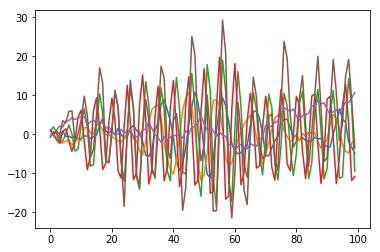

In [7]:
fourier = UnivariateStructure.cyclic_fourier(period=10, harmonics=2, W=np.identity(4))

ndlm_comp = NormalDLM(structure=(fourier + lc), V=2.5)

# the initial state prior
m0 = np.array([0, 0, 0, 0, 0])
C0 = np.identity(5)
state0 = np.random.multivariate_normal(m0, C0)

states = [state0]

for t in range(1, 100):
    states.append(ndlm_comp.state(states[t-1]))
    
obs = [None]
for t in range(1, 100):
    obs.append(ndlm_comp.observation(states[t]))
    
import matplotlib.pyplot as plt
plt.plot(range(100), states)
plt.plot(range(100), obs)
